   Year  CO2 Levels (ppm)  Arctic Ice (Million sq km)  Sea Level Rise (mm)  \
0  1960        313.176896                    7.811507             0.052446   
1  1961        318.348454                    8.089725             0.165100   
2  1962        316.711414                    7.699395             0.173223   
3  1963        319.344144                    8.097721             0.321207   
4  1964        324.811177                    7.787812             0.401246   

   Temperature Anomaly (°C)  
0                  0.005685  
1                 -0.045122  
2                  0.129383  
3                 -0.048318  
4                  0.182536  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        65 non-null     int64  
 1   CO2 Levels (ppm)            65 non-null     float64
 2   Arctic Ice (Mill

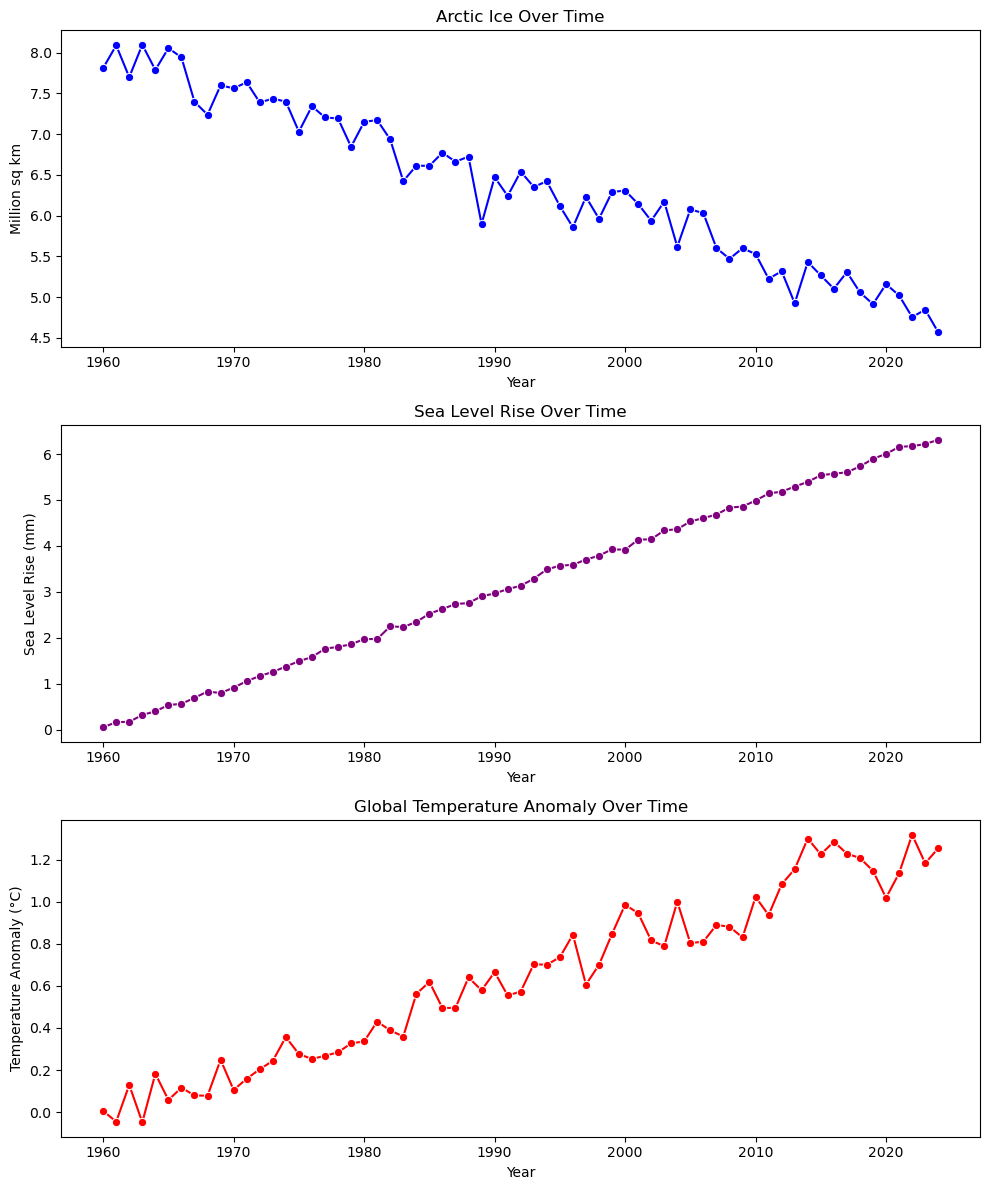

Mean Absolute Error for Arctic Ice (Million sq km): 0.17
Mean Absolute Error for Sea Level Rise (mm): 0.04
Mean Absolute Error for Temperature Anomaly (°C): 0.08
Models saved in: C:\Users\USER/Downloads/


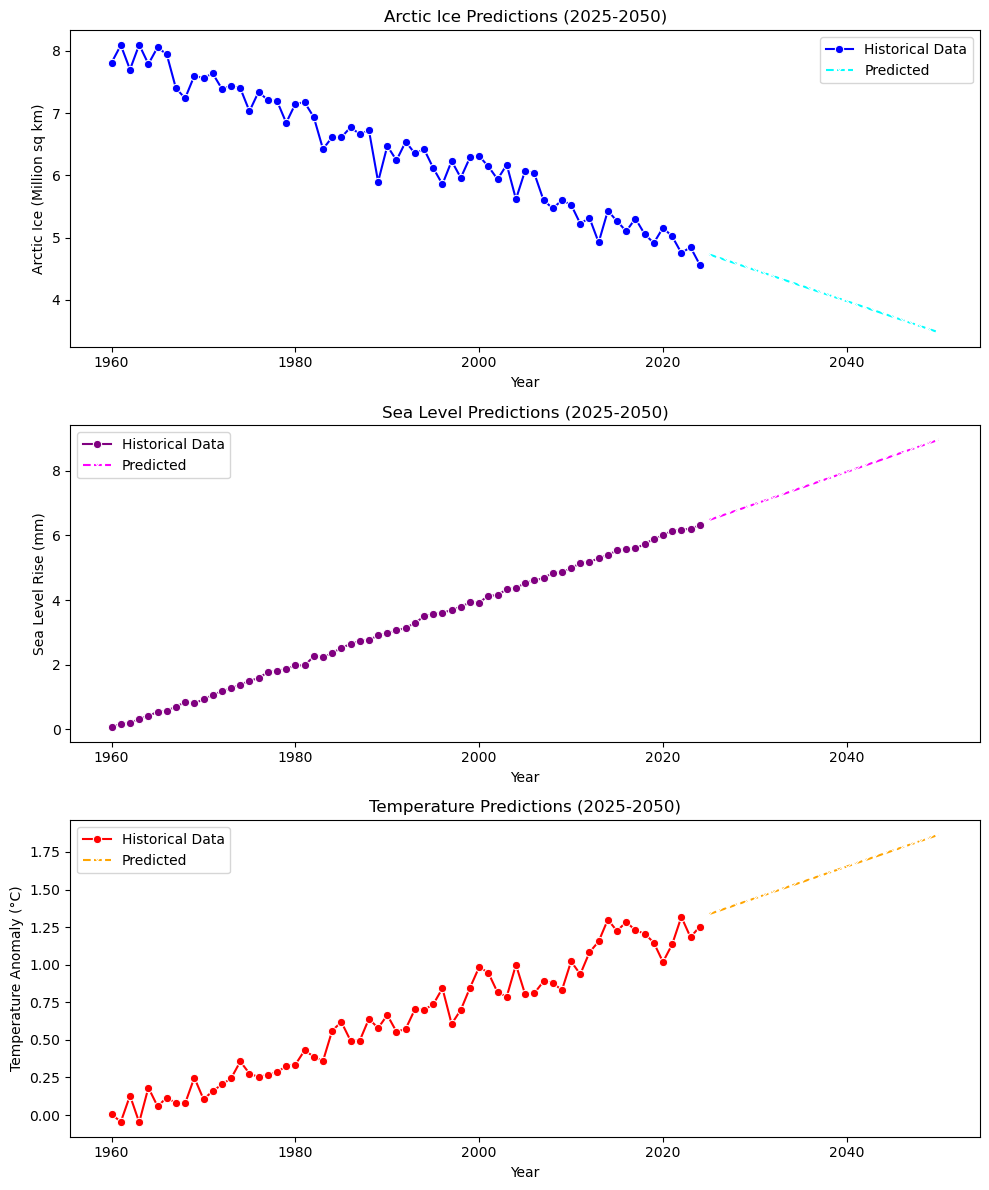

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import joblib
import os

# Load the dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\climate_dashboard\climate_data.csv") 

# Display basic info
print(df.head())
print(df.info())

# Data Preprocessing
df = df.dropna()  # Remove missing values
df = df[df["Year"] >= 1950]  # Focus on data from 1950 onwards

# Visualizing Climate Trends
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

sns.lineplot(x=df["Year"], y=df["Arctic Ice (Million sq km)"], marker="o", ax=axes[0], color="blue")
axes[0].set_title("Arctic Ice Over Time")
axes[0].set_ylabel("Million sq km")

sns.lineplot(x=df["Year"], y=df["Sea Level Rise (mm)"], marker="o", ax=axes[1], color="purple")
axes[1].set_title("Sea Level Rise Over Time")
axes[1].set_ylabel("Sea Level Rise (mm)")

sns.lineplot(x=df["Year"], y=df["Temperature Anomaly (°C)"], marker="o", ax=axes[2], color="red")
axes[2].set_title("Global Temperature Anomaly Over Time")
axes[2].set_ylabel("Temperature Anomaly (°C)")

plt.tight_layout()
plt.show()

# Train ML Models for Future Predictions
def train_model(feature, target):
    X = df[[feature]]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error for {target}: {mae:.2f}")
    
    return model

# Train models with column names
arctic_model = train_model("Year", "Arctic Ice (Million sq km)")
sea_level_model = train_model("Year", "Sea Level Rise (mm)")
temperature_model = train_model("Year", "Temperature Anomaly (°C)")

# Save models in Downloads folder
downloads_path = os.path.expanduser("~/Downloads/")

joblib.dump(arctic_model, os.path.join(downloads_path, "arctic_model.pkl"))
joblib.dump(sea_level_model, os.path.join(downloads_path, "sea_level_model.pkl"))
joblib.dump(temperature_model, os.path.join(downloads_path, "temperature_model.pkl"))

print(f"Models saved in: {downloads_path}")

# Predict Future Trends (2025-2050)
future_years_df = pd.DataFrame(np.arange(2025, 2051), columns=["Year"])

future_arctic = arctic_model.predict(future_years_df)
future_sea_level = sea_level_model.predict(future_years_df)
future_temperature = temperature_model.predict(future_years_df)


# Plot Predictions
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

sns.lineplot(x=df["Year"], y=df["Arctic Ice (Million sq km)"], marker="o", ax=axes[0], color="blue", label="Historical Data")
sns.lineplot(x=future_years.flatten(), y=future_arctic, marker="x", linestyle="dashed", ax=axes[0], color="cyan", label="Predicted")
axes[0].set_title("Arctic Ice Predictions (2025-2050)")

sns.lineplot(x=df["Year"], y=df["Sea Level Rise (mm)"], marker="o", ax=axes[1], color="purple", label="Historical Data")
sns.lineplot(x=future_years.flatten(), y=future_sea_level, marker="x", linestyle="dashed", ax=axes[1], color="magenta", label="Predicted")
axes[1].set_title("Sea Level Predictions (2025-2050)")

sns.lineplot(x=df["Year"], y=df["Temperature Anomaly (°C)"], marker="o", ax=axes[2], color="red", label="Historical Data")
sns.lineplot(x=future_years.flatten(), y=future_temperature, marker="x", linestyle="dashed", ax=axes[2], color="orange", label="Predicted")
axes[2].set_title("Temperature Predictions (2025-2050)")

plt.tight_layout()
plt.show()

